# Forecasting Neural Network

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<AxesSubplot:>

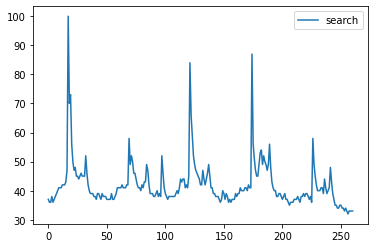

In [3]:
# Importing the dataset
ts = pd.read_csv('iPhone.csv')
ts.plot()

In [5]:
ts.head()

,date,search
0,2014-05-11,37
1,2014-05-18,36
2,2014-05-25,36
3,2014-06-01,38
4,2014-06-08,36


In [3]:
# Checking Stationarity
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts[['search']])
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))
# Conclusion:  The null hypothesis is rejected, the process has no unit root, the time series is stationary or does not have time-dependent structure.

ADF Statistic: -5.668556
p-value: 0.000001
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1, 1))
ts['sc'] = sc.fit_transform(ts[['search']])

In [5]:
# Creating lagged dataset
ts['x1'] = ts[['sc']].shift(1)
ts['x2'] = ts[['sc']].shift(2)
ts['x3'] = ts[['sc']].shift(3)
ts.columns = ['t','search','y','x1','x2','x3']

In [6]:
ts

,t,search,y,x1,x2,x3
0,2014-05-11,37,-0.852941,NaN,NaN,NaN
1,2014-05-18,36,-0.882353,-0.852941,NaN,NaN
2,2014-05-25,36,-0.882353,-0.882353,-0.852941,NaN
3,2014-06-01,38,-0.823529,-0.882353,-0.882353,-0.852941
4,2014-06-08,36,-0.882353,-0.823529,-0.882353,-0.882353
...,...,...,...,...,...,...
256,2019-04-07,32,-1.000000,-0.970588,-0.941176,-0.970588
257,2019-04-14,33,-0.970588,-1.000000,-0.970588,-0.941176
258,2019-04-21,33,-0.970588,-0.970588,-1.000000,-0.970588
259,2019-04-28,33,-0.970588,-0.970588,-0.970588,-1.000000


In [8]:
# Splitting the dataset into the Training set and Test set
train_size = int(len(ts[['y']]) * 0.7)
train, test = ts[3:train_size], ts[train_size:]
train_X, train_y = train[['x1','x2','x3']], train[['y']].to_numpy()
test_X, test_y = test[['x1','x2','x3']], test[['y']].to_numpy()

In [9]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\kater\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kater\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kater\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kater\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [10]:
# Creating model
#np.random.get_state()[1][0]
np.random.seed(605891282)

# Initialising the ANN
fnn = Sequential()

# Adding the input layer and the first hidden layer
fnn.add(Dense(output_dim = 7, activation = 'tanh', input_dim = 3))

# Adding the second hidden layer
fnn.add(Dense(output_dim = 5, activation = 'linear'))

# Adding the output layer
fnn.add(Dense(output_dim = 1, activation = 'tanh'))

# Compiling the ANN
fnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=3, units=7)`
  if __name__ == '__main__':
C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=5)`
  if sys.path[0] == '':
C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=1)`
  from ipykernel import kernelapp as app


In [106]:
# Fitting the ANN to the Training set
fnn.fit(train_X, train_y, batch_size = 8, nb_epoch = 200)

Epoch 1/200
179/179 [==============================] - 0s 201us/step - loss: 0.0396 - accuracy: 0.0056
Epoch 2/200
179/179 [==============================] - 0s 223us/step - loss: 0.0406 - accuracy: 0.0056
Epoch 3/200
179/179 [==============================] - 0s 201us/step - loss: 0.0403 - accuracy: 0.0056
Epoch 4/200
179/179 [==============================] - 0s 190us/step - loss: 0.0404 - accuracy: 0.0056
Epoch 5/200
  7/179 [>.............................] - ETA: 0s - loss: 0.0031 - accuracy: 0.0000e+00

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


179/179 [==============================] - 0s 179us/step - loss: 0.0398 - accuracy: 0.0056
Epoch 6/200
179/179 [==============================] - 0s 201us/step - loss: 0.0395 - accuracy: 0.0056
Epoch 7/200
179/179 [==============================] - 0s 195us/step - loss: 0.0403 - accuracy: 0.0056
Epoch 8/200
179/179 [==============================] - 0s 179us/step - loss: 0.0404 - accuracy: 0.0056
Epoch 9/200
179/179 [==============================] - 0s 179us/step - loss: 0.0396 - accuracy: 0.0056
Epoch 10/200
179/179 [==============================] - 0s 207us/step - loss: 0.0396 - accuracy: 0.0056
Epoch 11/200
179/179 [==============================] - 0s 251us/step - loss: 0.0399 - accuracy: 0.0056
Epoch 12/200
179/179 [==============================] - 0s 223us/step - loss: 0.0395 - accuracy: 0.0056
Epoch 13/200
179/179 [==============================] - 0s 251us/step - loss: 0.0397 - accuracy: 0.0056
Epoch 14/200
179/179 [==============================] - 0s 207us/step - loss: 0.0

179/179 [==============================] - 0s 173us/step - loss: 0.0389 - accuracy: 0.0056
Epoch 162/200
179/179 [==============================] - 0s 156us/step - loss: 0.0389 - accuracy: 0.0056
Epoch 163/200
179/179 [==============================] - 0s 156us/step - loss: 0.0387 - accuracy: 0.0056
Epoch 164/200
179/179 [==============================] - 0s 151us/step - loss: 0.0388 - accuracy: 0.0056
Epoch 165/200
179/179 [==============================] - 0s 156us/step - loss: 0.0389 - accuracy: 0.0056
Epoch 166/200
179/179 [==============================] - 0s 156us/step - loss: 0.0402 - accuracy: 0.0056
Epoch 167/200
179/179 [==============================] - 0s 151us/step - loss: 0.0396 - accuracy: 0.0056
Epoch 168/200
179/179 [==============================] - 0s 145us/step - loss: 0.0399 - accuracy: 0.0056
Epoch 169/200
179/179 [==============================] - 0s 151us/step - loss: 0.0387 - accuracy: 0.0056
Epoch 170/200
179/179 [==============================] - 0s 151us/ste

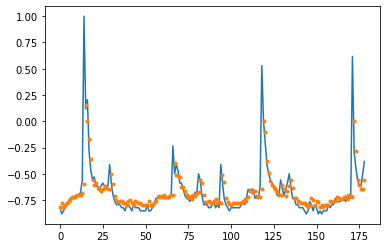

In [107]:
# Predicting scaled training set
yhat = fnn.predict(train_X)
from matplotlib import pyplot
pyplot.plot(train_y)
pyplot.plot(yhat, '.')
pyplot.show()

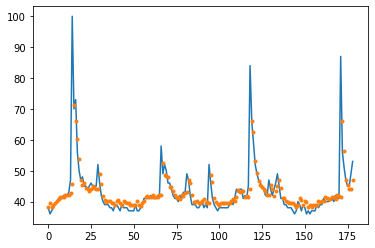

In [108]:
# Inversing scaling
tshat = pd.DataFrame(yhat, columns=['y']) 

tshat['searchhat'] = sc.inverse_transform(tshat)
tshat['search'] = train['search'][0:].reset_index()['search']
pyplot.plot(tshat['search'])
pyplot.plot(tshat['searchhat'], '.')
pyplot.show()

In [109]:
# Reporting performance
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(tshat['search'], tshat['searchhat']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.660


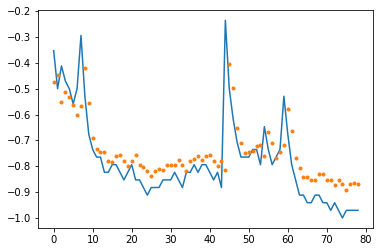

In [110]:
# Predicting scaled test set
X1, y1 = test_X, test_y
yhat1 = fnn.predict(X1)
from matplotlib import pyplot
pyplot.plot(y1)
pyplot.plot(yhat1, '.')
pyplot.show()

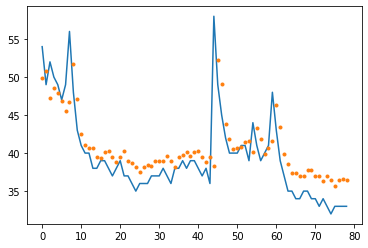

In [111]:
# Inversing scaling
tshat1 = pd.DataFrame(yhat1, columns=['y']) 
from sklearn.preprocessing import MinMaxScaler
tshat1['searchhat'] = sc.inverse_transform(tshat1)
tshat1['search'] = test['search'].reset_index()['search']
pyplot.plot(tshat1['search'])
pyplot.plot(tshat1['searchhat'], '.')
pyplot.show()

In [105]:
# Reporting performance
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(tshat1['search'], tshat1['searchhat']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4.016
